In [14]:
import pandas as pd  #loading, cleaning, and manipulating
import matplotlib.pyplot as plt  #visualize plots

from pathlib import Path

# project root = one level up from notebooks folder
project_root = Path("..").resolve()    #".." means go 1 folder up, resolve() means full absolute path
data_path = project_root / "data" / "processed" / "health_indicators_clean.csv"

df = pd.read_csv(data_path)
df.head()


,GHO (CODE),GHO (DISPLAY),GHO (URL),YEAR (DISPLAY),STARTYEAR,ENDYEAR,REGION (CODE),REGION (DISPLAY),COUNTRY (CODE),COUNTRY (DISPLAY),DIMENSION (TYPE),DIMENSION (CODE),DIMENSION (NAME),Numeric,Value,Low,High
0,#indicator+code,#indicator+name,#indicator+url,#date+year,#date+year+start,#date+year+end,#region+code,#region+name,#country+code,#country+name,#dimension+type,#dimension+code,#dimension+name,#indicator+value+num,#indicator+value,#indicator+value+low,#indicator+value+high
1,PHE_HHAIR_POP_CATEGORY_FUELS,Population with primary reliance on fuels and ...,https://www.who.int/data/gho/data/indicators/i...,2012,2012,2012,SEAR,South-East Asia,BTN,Bhutan,RESIDENCEAREATYPE,RESIDENCEAREATYPE_TOTL,Total,0.0,0 [0 - 0.03],0.0,0.032994834
2,W12_imports_dutyfree_A,Health warnings on cigarette packaging law app...,https://www.who.int/data/gho/data/indicators/i...,2022,2022,2022,SEAR,South-East Asia,BTN,Bhutan,NaN,NaN,NaN,NaN,No,NaN,NaN
3,WHOSIS_000001,Life expectancy at birth (years),https://www.who.int/data/gho/data/indicators/i...,2002,2002,2002,SEAR,South-East Asia,BTN,Bhutan,SEX,SEX_BTSX,Both sexes,67.84566543,67.8 [67.1-68.6],67.08312422,68.55874474
4,NCD_CHOL_MEANNONHDL_A,"Mean Non-HDL cholesterol, age-standardized",https://www.who.int/data/gho/data/indicators/i...,1991,1991,1991,SEAR,South-East Asia,BTN,Bhutan,SEX,SEX_FMLE,Female,3.0,3.0 [2.7-3.3],2.7,3.3


In [19]:
#errors="coerce chnages the empty value from empty to NaN(Not a number)"
df["YEAR"] = pd.to_numeric(df["YEAR (DISPLAY)"], errors="coerce")  #converts the Year column from string to int/floats
df["Value_num"] = pd.to_numeric(df["Numeric"], errors="coerce")    #converts the Numeric column from string to int/floats

df[["YEAR", "Value_num"]].head()   #shows first 5 rows of 2 columns to confirm update

,YEAR,Value_num
0,NaN,NaN
1,2012.0,0.000000
2,2022.0,NaN
3,2002.0,67.845665
4,1991.0,3.000000


In [20]:
#before cleaning
df.shape

(19990, 19)

In [30]:
df_clean = df.dropna(subset=["YEAR", "Value_num"])  #removes NaN values as we need only number to analysis
df_clean.shape


(17894, 19)

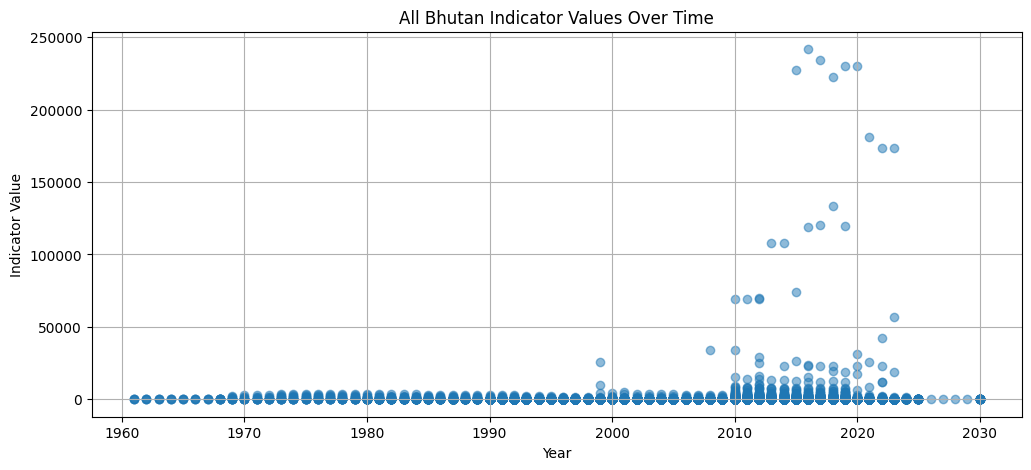

In [24]:
plt.figure(figsize=(12,5))  #12 inches long, 5 inches tall
plt.scatter(df_clean["YEAR"], df_clean["Value_num"], alpha=0.5)  #alpha=0.5 means points r tranparent so see which is denser/ overlapping
plt.title("All Bhutan Indicator Values Over Time")
plt.xlabel("Year")
plt.ylabel("Indicator Value")
plt.grid(True)  #shows background grid lines to see precision while analysing 
plt.show()


#denser places spot, means WHO could there point learn more about the Bhutan health and get many reports from 2010


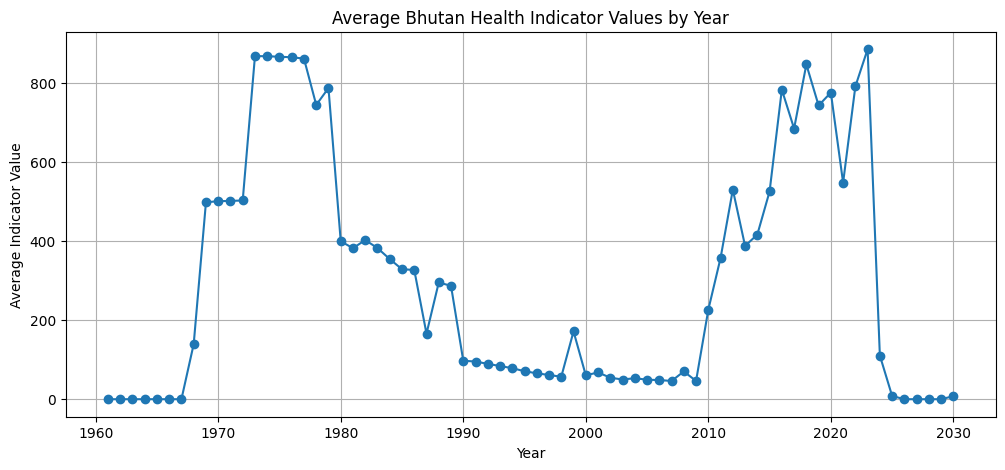

In [29]:
#data visualization in group
yearly_avg = (
    df_clean.groupby("YEAR")   #group all rows for same year
    ["Value_num"].mean()       #take avg numerical for each year
    .reset_index()             #turn grouped data into clean DataFrame
)

plt.figure(figsize=(12,5))
plt.plot(yearly_avg["YEAR"], yearly_avg["Value_num"], marker="o")
plt.title("Average Bhutan Health Indicator Values by Year")
plt.xlabel("Year")
plt.ylabel("Average Indicator Value")
plt.grid(True)
plt.show()

#The purpose of this graph is not to measure actual health improvements, but to understand data availability and scale differences in the WHO dataset.
